## Steps

#### 1) Importing libraries


#### 2) Read Data


#### 3) Data Preprocessing 


#### 4) Feature Engineering 

                    
#### 5) Model Training

## 1) Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

## 2) Read Data

In [2]:
df=pd.read_csv('E:\Rajalakshmi\PROJECT\online fraud payment.csv')

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99994,10,PAYMENT,62.19,C559473129,215097.09,215034.89,M1361246816,0.00,0.00,0,0
99995,10,PAYMENT,4020.66,C1410794718,159929.00,155908.34,M1257036576,0.00,0.00,0,0
99996,10,PAYMENT,18345.49,C744303677,6206.00,0.00,M1785344556,0.00,0.00,0,0
99997,10,CASH_IN,183774.91,C104331851,39173.00,222947.91,C36392889,54925.05,0.00,0,0


## 3) Data Preprocessing 

In [4]:
# To see the information of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            99999 non-null  int64  
 1   type            99999 non-null  object 
 2   amount          99999 non-null  float64
 3   nameOrig        99999 non-null  object 
 4   oldbalanceOrg   99999 non-null  float64
 5   newbalanceOrig  99999 non-null  float64
 6   nameDest        99999 non-null  object 
 7   oldbalanceDest  99999 non-null  float64
 8   newbalanceDest  99999 non-null  float64
 9   isFraud         99999 non-null  int64  
 10  isFlaggedFraud  99999 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.4+ MB


In [5]:
#To check if there is any null value in the dataset
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
#check shape of the entire dataframe using .shape attribute
df.shape

(99999, 11)

In [7]:
#To see the unique values in the dataset
df.nunique()

step                 10
type                  5
amount            99469
nameOrig          99999
oldbalanceOrg     56389
newbalanceOrig    46427
nameDest          51550
oldbalanceDest    51976
newbalanceDest    18759
isFraud               2
isFlaggedFraud        1
dtype: int64

In [8]:
#To check the duplicate values in the dataset
df.duplicated().sum()

0

In [9]:
# To Check the describe analysis of the data
df.describe(include="all")

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,99999.000000,99999,9.999900e+04,99999,9.999900e+04,9.999900e+04,99999,9.999900e+04,9.999900e+04,99999.000000,99999.0
unique,NaN,5,NaN,99999,NaN,NaN,51550,NaN,NaN,NaN,NaN
top,NaN,PAYMENT,NaN,C1231006815,NaN,NaN,C985934102,NaN,NaN,NaN,NaN
freq,NaN,39511,NaN,1,NaN,NaN,78,NaN,NaN,NaN,NaN
mean,8.499625,NaN,1.736038e+05,NaN,8.777699e+05,8.940748e+05,NaN,8.805185e+05,1.184094e+06,0.001160,0.0
std,1.825548,NaN,3.443017e+05,NaN,2.673322e+06,2.711352e+06,NaN,2.402317e+06,2.802533e+06,0.034039,0.0
min,1.000000,NaN,3.200000e-01,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,NaN,9.963495e+03,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,NaN,5.275432e+04,NaN,2.006100e+04,0.000000e+00,NaN,2.083986e+04,4.990918e+04,0.000000,0.0
75%,10.000000,NaN,2.117667e+05,NaN,1.902150e+05,2.148176e+05,NaN,5.882787e+05,1.058208e+06,0.000000,0.0


# Outliers detection
    we have to remove this outliers in data frame. because outliers make a data leakage in model  train and  test 
    so we have  remove this outliers in data frame

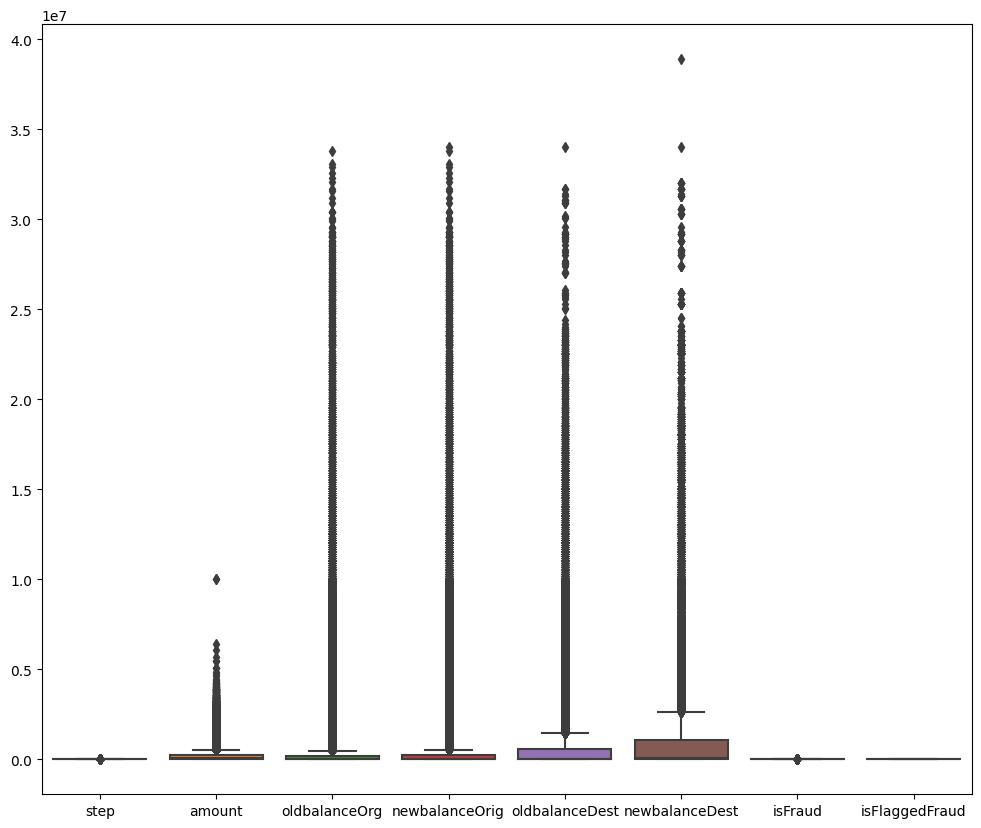

In [10]:
plt.figure(figsize=(12,10)) 
sns.boxplot(df)
plt.show()

In [11]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [12]:
#handling outlier in step
q1=df['step'].quantile(0.25)
q3=df['step'].quantile(0.75)
IQR=q3-q1
lower_range=q1-1.5*IQR
upper_range=q3+IQR 

print(f"q1 = {q1}\nq3 = {q3}\nIQR = {IQR}\nlower_range = {lower_range}\nupper_range = {upper_range}")

q1 = 8.0
q3 = 10.0
IQR = 2.0
lower_range = 5.0
upper_range = 12.0


In [13]:
#capping
df['step']=np.where(df['step']<lower_range,lower_range,
                      np.where(df['step']>upper_range,upper_range,
                      df['step']))
df['step']

0         5.0
1         5.0
2         5.0
3         5.0
4         5.0
         ... 
99994    10.0
99995    10.0
99996    10.0
99997    10.0
99998    10.0
Name: step, Length: 99999, dtype: float64

In [14]:
#handling outlier in step
q1=df['amount'].quantile(0.25)
q3=df['amount'].quantile(0.75)
IQR=q3-q1
lower_range=q1-1.5*IQR
upper_range=q3+IQR 

print(f"q1 = {q1}\nq3 = {q3}\nIQR = {IQR}\nlower_range = {lower_range}\nupper_range = {upper_range}")

q1 = 9963.494999999999
q3 = 211766.66999999998
IQR = 201803.175
lower_range = -292741.26749999996
upper_range = 413569.845


In [15]:
#capping
df['amount']=np.where(df['amount']<lower_range,lower_range,
                      np.where(df['amount']>upper_range,upper_range,
                      df['amount']))
df['amount']

0          9839.64
1          1864.28
2           181.00
3           181.00
4         11668.14
           ...    
99994        62.19
99995      4020.66
99996     18345.49
99997    183774.91
99998     82237.17
Name: amount, Length: 99999, dtype: float64

In [16]:
#handling outlier in step
q1=df['oldbalanceOrg'].quantile(0.25)
q3=df['oldbalanceOrg'].quantile(0.75)
IQR=q3-q1
lower_range=q1-1.5*IQR
upper_range=q3+IQR 

print(f"q1 = {q1}\nq3 = {q3}\nIQR = {IQR}\nlower_range = {lower_range}\nupper_range = {upper_range}")

q1 = 0.0
q3 = 190214.99
IQR = 190214.99
lower_range = -285322.485
upper_range = 380429.98


In [17]:
#capping
df['oldbalanceOrg']=np.where(df['oldbalanceOrg']<lower_range,lower_range,
                      np.where(df['oldbalanceOrg']>upper_range,upper_range,
                      df['oldbalanceOrg']))
df['oldbalanceOrg']

0        170136.00
1         21249.00
2           181.00
3           181.00
4         41554.00
           ...    
99994    215097.09
99995    159929.00
99996      6206.00
99997     39173.00
99998      6031.00
Name: oldbalanceOrg, Length: 99999, dtype: float64

In [18]:
#handling outlier in step
q1=df['newbalanceOrig'].quantile(0.25)
q3=df['newbalanceOrig'].quantile(0.75)
IQR=q3-q1
lower_range=q1-1.5*IQR
upper_range=q3+IQR 

print(f"q1 = {q1}\nq3 = {q3}\nIQR = {IQR}\nlower_range = {lower_range}\nupper_range = {upper_range}")

q1 = 0.0
q3 = 214817.59999999998
IQR = 214817.59999999998
lower_range = -322226.39999999997
upper_range = 429635.19999999995


In [19]:
#capping
df['newbalanceOrig']=np.where(df['newbalanceOrig']<lower_range,lower_range,
                      np.where(df['newbalanceOrig']>upper_range,upper_range,
                      df['newbalanceOrig']))
df['newbalanceOrig']

0        160296.36
1         19384.72
2             0.00
3             0.00
4         29885.86
           ...    
99994    215034.89
99995    155908.34
99996         0.00
99997    222947.91
99998         0.00
Name: newbalanceOrig, Length: 99999, dtype: float64

In [20]:
#handling outlier in step
q1=df['oldbalanceDest'].quantile(0.25)
q3=df['oldbalanceDest'].quantile(0.75)
IQR=q3-q1
lower_range=q1-1.5*IQR
upper_range=q3+IQR 

print(f"q1 = {q1}\nq3 = {q3}\nIQR = {IQR}\nlower_range = {lower_range}\nupper_range = {upper_range}")

q1 = 0.0
q3 = 588278.6799999999
IQR = 588278.6799999999
lower_range = -882418.0199999999
upper_range = 1176557.3599999999


In [21]:
#capping
df['oldbalanceDest']=np.where(df['oldbalanceDest']<lower_range,lower_range,
                      np.where(df['oldbalanceDest']>upper_range,upper_range,
                      df['oldbalanceDest']))
df['oldbalanceDest']

0             0.00
1             0.00
2             0.00
3         21182.00
4             0.00
           ...    
99994         0.00
99995         0.00
99996         0.00
99997     54925.05
99998    592635.66
Name: oldbalanceDest, Length: 99999, dtype: float64

In [22]:
#handling outlier in step
q1=df['newbalanceDest'].quantile(0.25)
q3=df['newbalanceDest'].quantile(0.75)
IQR=q3-q1
lower_range=q1-1.5*IQR
upper_range=q3+IQR 

print(f"q1 = {q1}\nq3 = {q3}\nIQR = {IQR}\nlower_range = {lower_range}\nupper_range = {upper_range}")

q1 = 0.0
q3 = 1058207.96
IQR = 1058207.96
lower_range = -1587311.94
upper_range = 2116415.92


In [23]:
#capping
df['newbalanceDest']=np.where(df['newbalanceDest']<lower_range,lower_range,
                      np.where(df['newbalanceDest']>upper_range,upper_range,
                      df['newbalanceDest']))
df['newbalanceDest']

0             0.00
1             0.00
2             0.00
3             0.00
4             0.00
           ...    
99994         0.00
99995         0.00
99996         0.00
99997         0.00
99998    799140.46
Name: newbalanceDest, Length: 99999, dtype: float64

In [24]:
#handling outlier in step
q1=df['isFraud'].quantile(0.25)
q3=df['isFraud'].quantile(0.75)
IQR=q3-q1
lower_range=q1-1.5*IQR
upper_range=q3+IQR 

print(f"q1 = {q1}\nq3 = {q3}\nIQR = {IQR}\nlower_range = {lower_range}\nupper_range = {upper_range}")

q1 = 0.0
q3 = 0.0
IQR = 0.0
lower_range = 0.0
upper_range = 0.0


In [25]:
#capping
df['isFraud']=np.where(df['isFraud']<lower_range,lower_range,
                      np.where(df['isFraud']>upper_range,upper_range,
                      df['isFraud']))
df['isFraud']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
99994    0.0
99995    0.0
99996    0.0
99997    0.0
99998    0.0
Name: isFraud, Length: 99999, dtype: float64

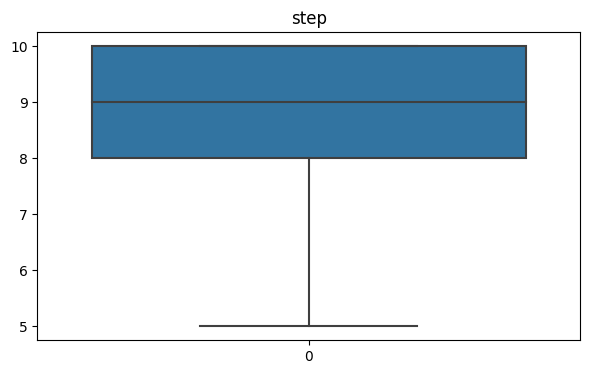

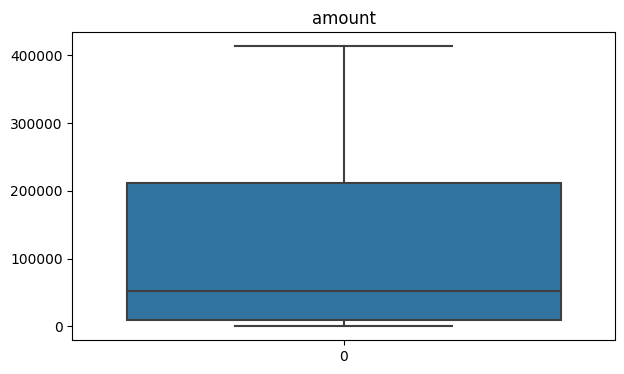

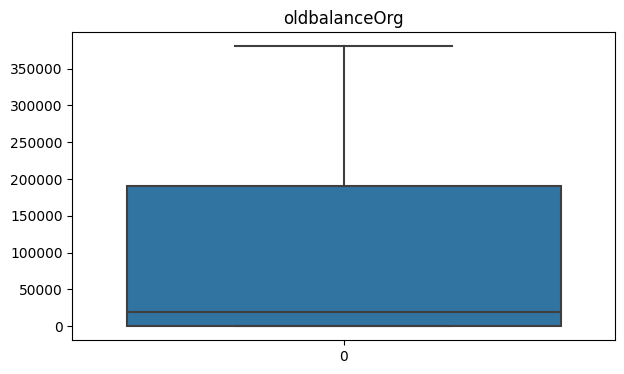

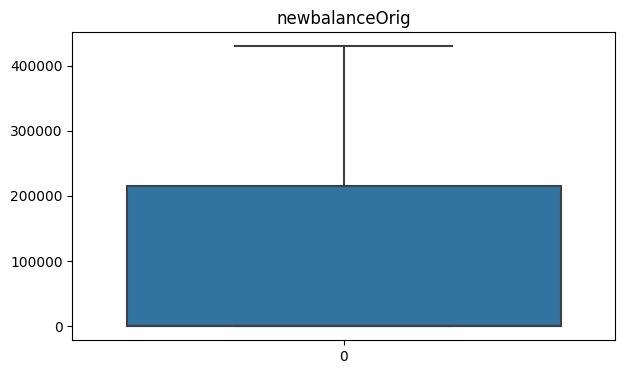

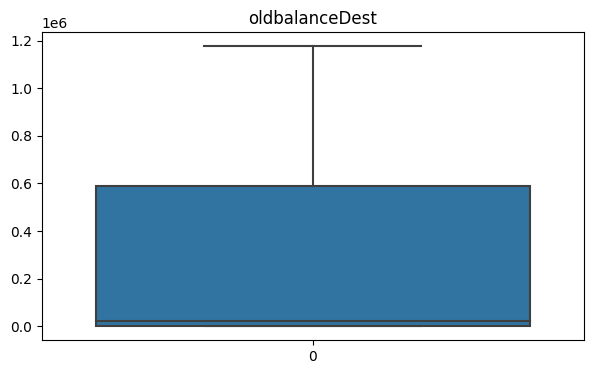

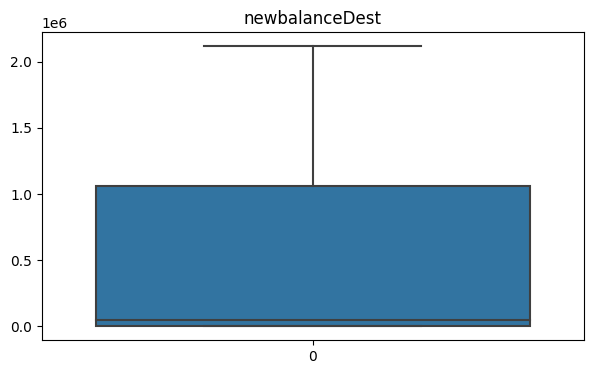

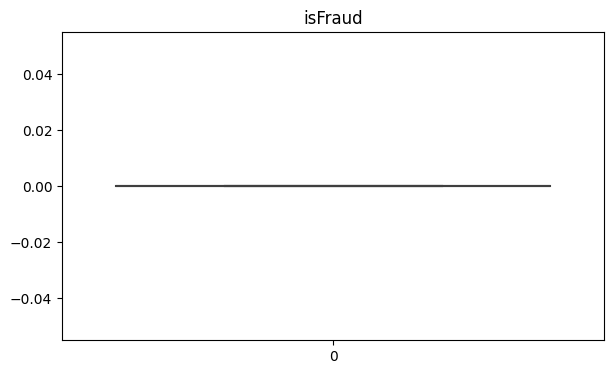

In [26]:
#Using box plot for finding outliers

plt.figure(figsize=(7,4))
sns.boxplot(df['step'])
plt.title('step')

plt.figure(figsize=(7,4))
sns.boxplot(df['amount'])
plt.title('amount')


plt.figure(figsize=(7,4))
sns.boxplot(df['oldbalanceOrg'])
plt.title('oldbalanceOrg')

plt.figure(figsize=(7,4))
sns.boxplot(df['newbalanceOrig'])
plt.title('newbalanceOrig')


plt.figure(figsize=(7,4))
sns.boxplot(df['oldbalanceDest'])
plt.title('oldbalanceDest')

plt.figure(figsize=(7,4))
sns.boxplot(df['newbalanceDest'])
plt.title('newbalanceDest')

plt.figure(figsize=(7,4))
sns.boxplot(df['isFraud'])
plt.title('isFraud')



plt.show()

## 4) Feature Engineering

   |Feature Engineering is the process of extracting and organizing the important feature from raw data 
      in such a way that if fits the purpose of the machine learning model.|

In [27]:
# Target and Labels
df.copy()
X =df.drop(['isFraud','isFlaggedFraud'],axis=1).copy()
Y =df['isFraud'].copy()



In [28]:
X

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,5.0,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00
1,5.0,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00
2,5.0,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00
3,5.0,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00
4,5.0,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00
...,...,...,...,...,...,...,...,...,...
99994,10.0,PAYMENT,62.19,C559473129,215097.09,215034.89,M1361246816,0.00,0.00
99995,10.0,PAYMENT,4020.66,C1410794718,159929.00,155908.34,M1257036576,0.00,0.00
99996,10.0,PAYMENT,18345.49,C744303677,6206.00,0.00,M1785344556,0.00,0.00
99997,10.0,CASH_IN,183774.91,C104331851,39173.00,222947.91,C36392889,54925.05,0.00


In [29]:
Y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
99994    0.0
99995    0.0
99996    0.0
99997    0.0
99998    0.0
Name: isFraud, Length: 99999, dtype: float64

    - *The above method seperates the features and labels from the data. The label variable are copied into y
      and the remaining features are copied into x.*

# Feature Encoding

  - Feature encoding is the process of transforming the categoriacl datas into numercial data. By transforming 
    the data our machine learning model can understand the data

In [30]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [31]:
# Encoding feature
encoder =OrdinalEncoder()
X_encode=encoder.fit(X)
import joblib as jb
jb.dump(X_encode,'file/train/model/train_encode_model.pkl')
X_encode=encoder.transform(X)
X=pd.DataFrame(X_encode, columns=X.columns)

In [32]:
X

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,0.0,3.0,24421.0,11862.0,32299.0,20605.0,31980.0,0.0,0.0
1,0.0,3.0,5274.0,34345.0,12041.0,6963.0,33287.0,0.0,0.0
2,0.0,4.0,479.0,15636.0,212.0,0.0,9303.0,0.0,0.0
3,0.0,1.0,479.0,91776.0,212.0,0.0,8273.0,3908.0,0.0
4,0.0,3.0,27714.0,54040.0,18556.0,9268.0,16681.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
99994,5.0,3.0,163.0,77085.0,34271.0,23155.0,19346.0,0.0,0.0
99995,5.0,3.0,11211.0,21051.0,31850.0,20379.0,17200.0,0.0,0.0
99996,5.0,3.0,36220.0,86687.0,4148.0,0.0,28010.0,0.0,0.0
99997,5.0,0.0,70920.0,2198.0,17767.0,23465.0,8118.0,7349.0,0.0


In [33]:
X.to_csv('file/train/Processed/encoded_processed.csv',index=False)

# Splitting train and test datas

In [34]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, train_size=0.7, shuffle=True, random_state=123)

 - This splits the data into test and train using train_test_split function. The x and y variables are seperated into
   x_train,x_test,y_train and y_test at a train_size of 0.7(ie, 70% of the data). The shuffle=True function randomly shuffles 
   the data with a random state of 123

In [35]:
# save train and test data
X_train.to_csv('file/train/raw/X_train.csv',index=False)
Y_train.to_csv('file/train/raw/Y_train.csv',index=False)

X_test.to_csv('file/evaluate/raw/X_test.csv',index=False)
Y_test.to_csv('file/evaluate/raw/Y_test.csv',index=False)

# Model Training






- **Model training is a process in which a machine learning algorithm is fed with training data from which it can learn.**

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
reg =RandomForestRegressor()
reg.fit(X_train,Y_train)
print('Train score:',reg.score(X_train,Y_train)* 100)

Train score: 100.0


In [38]:
import joblib as jb
jb.dump(reg,'file/train/model/reg.pkl')    

['file/train/model/reg.pkl']

# Prediction

In [39]:
model=jb.load('file/train/model/reg.pkl')
#encode_model=jb.load('file/train/model/train_encode_model.pkl')


In [40]:
encode_model

NameError: name 'encode_model' is not defined

In [41]:
model

RandomForestRegressor()

In [42]:
y_pred=pd.DataFrame(model.predict(X_test))
y_pred

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
29995,0.0
29996,0.0
29997,0.0
29998,0.0


In [43]:
from math import sqrt
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [44]:
print('Mean Absolute Error:',mean_absolute_error(y_pred,Y_test))
print('Mean Squared Error :',mean_squared_error(y_pred,Y_test))
print('Root Mean Squared Error :',sqrt(mean_squared_error(y_pred,Y_test)))

Mean Absolute Error: 0.0
Mean Squared Error : 0.0
Root Mean Squared Error : 0.0
